#VISUALIZACION DE LOS DATOS

In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   
import statistics

boston = load_boston()
X = boston.data
y = boston.target

x = range(0, boston.data.shape[0],1)  # same as x = range(0, len(y),1)

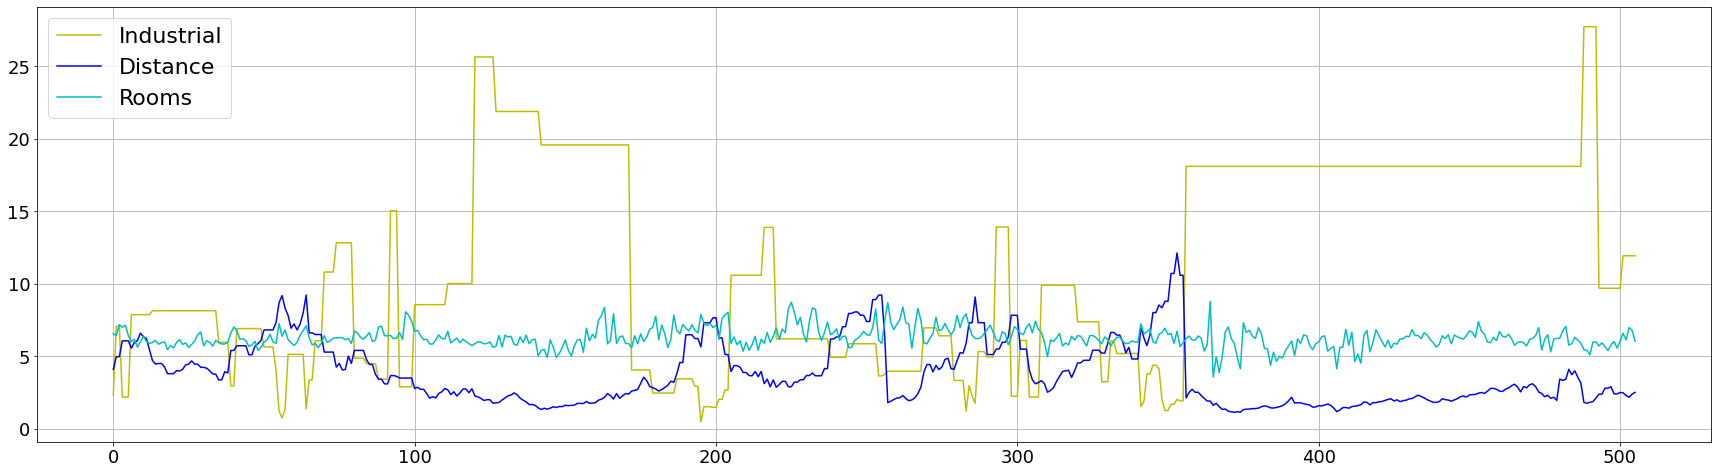

In [6]:
CRIME = 0; ZN = 1; INDUSTRIAL = 2; ROOMS = 5; DISTANCE = 7; 

# Plot of several features
plt.figure(figsize=(30,8))
plt.plot(x, X[:,INDUSTRIAL], 'y-', label = 'Industrial')
plt.plot(x, X[:,DISTANCE], 'b-', label = 'Distance')
plt.plot(x, X[:,ROOMS], 'c-', label = 'Rooms')
plt.rcParams.update({'font.size':18});
plt.legend(prop={'size':22}); plt.grid(); 

In [9]:
#  print (boston.DESCR) Text information about this dataset

print("-This dataset data contains 506 samples (rows) and 13 features (columns)")
print(X.shape, "\n") # This dataset data contains 506 samples (rows) and 13 features (columns)

print("-This dataset is adequate for Regression. The target are numbers.")
print(y.shape, "\n") # This dataset is adequate for Regression. The target are numbers. 

print("-Print rows of data, starting from row 0 to row 3-1")
print(X[0:3,:], "\n") # print rows of data, starting from row 0 to row 3-1

print("-Rows of target data, starting from row 0 to row 5-1")
print(y[0:5], "\n")   # rows of target data, starting from row 0 to row 5-1

print("-Print the feature ZN from the third row")
print(X[1,ZN], "\n") # print the feature ZN from the third row

print("-Print the feature CRIME for rows 1 and 2")
print(X[1:3,CRIME], "\n") # print the feature CRIME for rows 1 and 2

-This dataset data contains 506 samples (rows) and 13 features (columns)
(506, 13) 

-This dataset is adequate for Regression. The target are numbers.
(506,) 

-Print rows of data, starting from row 0 to row 3-1
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]] 

-Rows of target data, starting from row 0 to row 5-1
[24.  21.6 34.7 33.4 36.2] 

-Print the feature ZN from the third row
0.0 

-Print the feature CRIME for rows 1 and 2
[0.02731 0.02729] 



0:    mean: 3.61, variance: 73.99
1:    mean: 11.36, variance: 543.94
2:    mean: 11.14, variance: 47.06
3:    mean: 0.07, variance: 0.06
4:    mean: 0.55, variance: 0.01
5:    mean: 6.28, variance: 0.49
6:    mean: 68.57, variance: 792.36
7:    mean: 3.80, variance: 4.43
8:    mean: 9.55, variance: 75.82
9:    mean: 408.24, variance: 28404.76
10:    mean: 18.46, variance: 4.69
11:    mean: 356.67, variance: 8334.75
12:    mean: 12.65, variance: 50.99


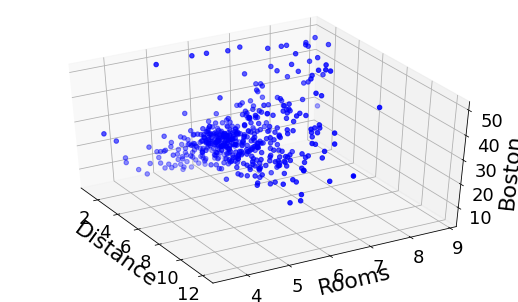

In [11]:
# Obtains the mean and the variance of each feature
mean = []; variance = []
for i in range(boston.data.shape[1]):
    mean.append(statistics.mean(X[:,i]))
    variance.append(statistics.variance(X[:,i])) 

# Prints each feature mean and variance
for i in range(boston.data.shape[1]):
    print(format(i) + ":    mean: {:.2f}".format(mean[i]) + ", variance: {:.2f}".format(variance[i]))

fig, axs = plt.subplots(1,2, figsize=(7,4))

# 3D Scatter of two figures
axs[1] = Axes3D(fig, elev=40, azim=-30)
axs[1].scatter(X[:,DISTANCE], X[:,ROOMS], y, c='b', marker='o')
axs[1].set_xlabel('Distance', fontsize=22)
axs[1].set_ylabel('Rooms', fontsize=22)
axs[1].set_zlabel('Boston', fontsize=22) 

plt.show()

#CREACION DEL MODELO

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

mn_scaler = preprocessing.MinMaxScaler()
X = mn_scaler.fit_transform(X)
mn_scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

model = Sequential()
model.add(Dense(25, input_dim=X.shape[1], activation='relu'))   
model.add(Dense(1))

model.summary()

model.compile(loss='MeanSquaredError', optimizer='adam', metrics = 'mae')

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=60, batch_size=4, verbose=1)

#VISUALIZACION DE LOS RESULTADOS

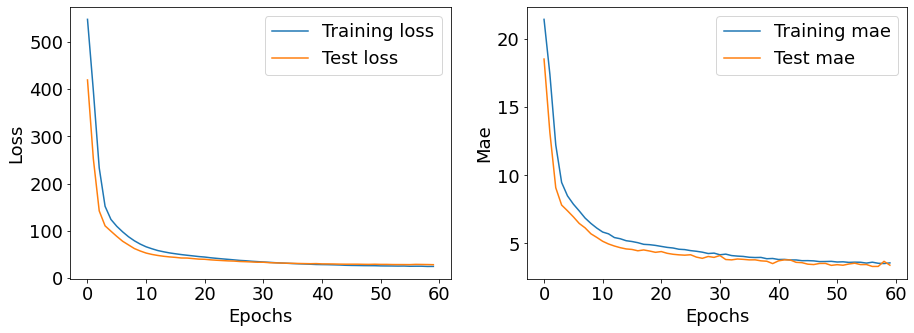

In [13]:
def plot(history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(history.history['loss'], label='Training loss')
    ax[0].plot(history.history['val_loss'], label='Test loss')

    ax[0].legend()
    
    ax[1].plot(history.history['mae'], label='Training mae')
    ax[1].plot(history.history['val_mae'], label='Test mae')
    
    ax[1].legend()
    
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Mae')

plot(history)